<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/BNL_Scripts/Peak_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peak Analysis

*Designed to execute various XRD analyses*

## Imports

In [3]:
from google.colab import drive
import csv
import glob
import numpy as np
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from scipy.signal import find_peaks
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Extract Data From Google Drive

In [4]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [11]:
# Directory Locations for information
Topas_path = '/content/drive/Shareddrives/BNL_June_2024/DataFiles/CeO2_PDF_600_1sec/integration/'

# Collect all XRD xy files in 2 theta
tth_files = glob.glob(Topas_path + '*67ac61*v1.xy')

In [15]:
Z = []
for name in tth_files:
  data = pd.read_csv(name, sep = "\s+", header=None).astype(float)
  data.columns = ["2theta","I"]
  Z.append(data["I"])


In [16]:
X = pd.read_csv(name, sep = "\s+", header=None).astype(float)[0]

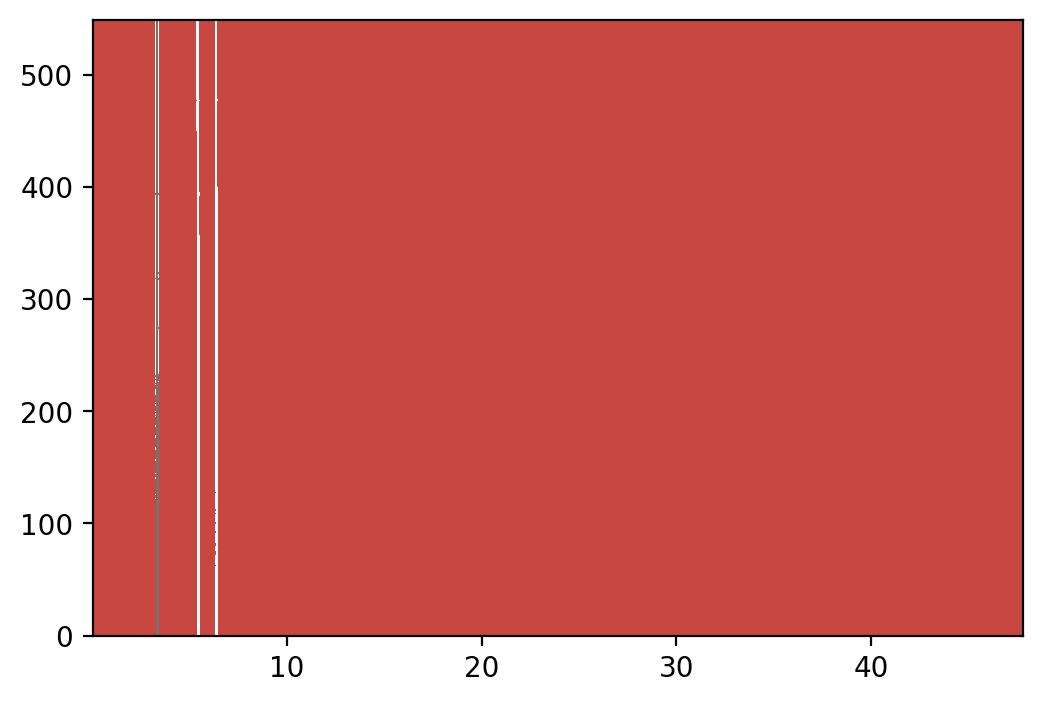

In [27]:
fig1, ax1 = plt.subplots(figsize=(6,4,),dpi=200)
ax1.contourf(X, range(len(tth_files)), Z, 2, cmap='RdGy')
#plt.colorbar();